In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities[0:5]

['ribeira grande', 'taolanaro', 'garowe', 'zhigansk', 'rikitea']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

new_cities=[]
cloudiness=[]
country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]
print("Beginning Data Retrieval")
print("-------------------------")
counter = 0
for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Wind_speed.append(response["wind"]["speed"])
        new_cities.append(city)
        counter=counter+1
        print("Processing Record " + str(counter) + " | "+city )
    except:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 | ribeira grande
City not found. Skipping...
Processing Record 2 | garowe
Processing Record 3 | zhigansk
Processing Record 4 | rikitea
Processing Record 5 | port alfred
Processing Record 6 | faya
Processing Record 7 | cabo san lucas
Processing Record 8 | san policarpo
Processing Record 9 | san andres
Processing Record 10 | bandarbeyla
City not found. Skipping...
Processing Record 11 | jati
Processing Record 12 | beringovskiy
Processing Record 13 | mataura
Processing Record 14 | hermanus
Processing Record 15 | albany
Processing Record 16 | castro
Processing Record 17 | egvekinot
Processing Record 18 | san cristobal
Processing Record 19 | emerald
Processing Record 20 | tuktoyaktuk
Processing Record 21 | laguna
Processing Record 22 | ancud
Processing Record 23 | avarua
Processing Record 24 | mount gambier
Processing Record 25 | bluff
Processing Record 26 | arraial do cabo
City not found. Skipping...
Processing Record 2

Processing Record 228 | shingu
Processing Record 229 | nabire
Processing Record 230 | anadyr
Processing Record 231 | upata
Processing Record 232 | upernavik
Processing Record 233 | sembakung
Processing Record 234 | ukiah
Processing Record 235 | lovozero
Processing Record 236 | hamilton
Processing Record 237 | luderitz
Processing Record 238 | nuzvid
City not found. Skipping...
Processing Record 239 | gazli
Processing Record 240 | inuvik
Processing Record 241 | abu samrah
Processing Record 242 | tilichiki
Processing Record 243 | souillac
Processing Record 244 | chiungutwa
Processing Record 245 | hendersonville
Processing Record 246 | skjervoy
Processing Record 247 | dingle
Processing Record 248 | hualmay
Processing Record 249 | sistranda
Processing Record 250 | mizdah
Processing Record 251 | basco
Processing Record 252 | misratah
Processing Record 253 | bhawanipatna
Processing Record 254 | rocha
Processing Record 255 | tirumakudal narsipur
Processing Record 256 | qaqortoq
Processing Reco

Processing Record 446 | codo
Processing Record 447 | dongying
Processing Record 448 | palmer
Processing Record 449 | alofi
City not found. Skipping...
Processing Record 450 | port-de-bouc
Processing Record 451 | lorengau
Processing Record 452 | kalemie
Processing Record 453 | elizabeth city
City not found. Skipping...
Processing Record 454 | duluth
Processing Record 455 | whitehorse
Processing Record 456 | coihaique
Processing Record 457 | sola
Processing Record 458 | isangel
Processing Record 459 | bud
Processing Record 460 | yuli
Processing Record 461 | mahajanga
Processing Record 462 | los llanos de aridane
Processing Record 463 | abnub
Processing Record 464 | cayenne
City not found. Skipping...
Processing Record 465 | hanting
Processing Record 466 | kem
Processing Record 467 | makakilo city
Processing Record 468 | krasnovishersk
Processing Record 469 | thinadhoo
Processing Record 470 | talnakh
Processing Record 471 | helong
Processing Record 472 | bichena
Processing Record 473 | an

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df_temps = pd.DataFrame({"City":new_cities,"Cloudiness":cloudiness, "Country":country,"Date":Date, "Humidity":Humidity,"Lat":Lat, "Lng":Lng, "Max Temp": Max_temp, "Wind Speed":Wind_speed})
df_temps.to_csv(output_data_file, index=False)
df_temps.head() 


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,92,PT,1542505582,98,38.52,-28.70,17.90,5.21
1,garowe,56,SO,1542506085,96,8.41,48.48,17.52,1.66
2,zhigansk,12,RU,1542505531,30,66.77,123.37,-29.28,1.31
3,rikitea,56,PF,1542505455,100,-23.12,-134.97,23.77,5.71
4,port alfred,44,ZA,1542505535,96,-33.59,26.89,16.20,2.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

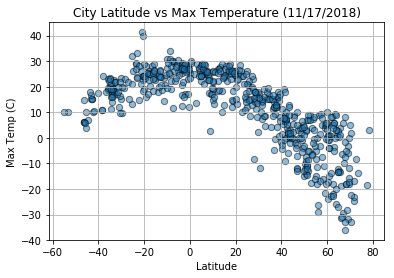

In [32]:
df_temps.plot.scatter(x="Lat",y="Max Temp",grid=True, s= 40, alpha=0.5, marker = "o", edgecolors = "black")
plt.title("City Latitude vs Max Temperature (11/17/2018)")
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
plt.savefig("output_data/latitudevstemperature.png")

#### Latitude vs. Humidity Plot

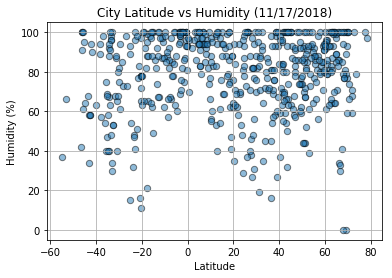

In [33]:
df_temps.plot.scatter(x="Lat",y="Humidity",grid=True, s= 40, alpha=0.5, marker = "o", edgecolors = "black")
plt.title("City Latitude vs Humidity (11/17/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("output_data/latitudevshumidity.png")

#### Latitude vs. Cloudiness Plot

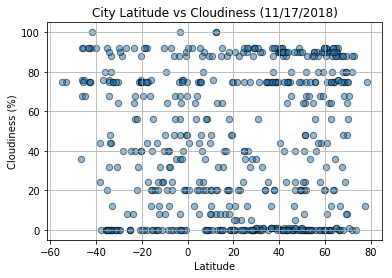

In [34]:
df_temps.plot.scatter(x="Lat",y="Cloudiness",grid=True, s= 40, alpha=0.5, marker = "o", edgecolors = "black")
plt.title("City Latitude vs Cloudiness (11/17/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("output_data/latitudevscloudiness.png")

#### Latitude vs. Wind Speed Plot

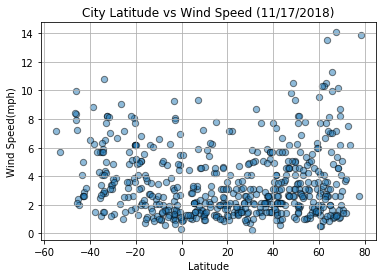

In [35]:
df_temps.plot.scatter(x="Lat",y="Wind Speed",grid=True, s= 40, alpha=0.5, marker = "o", edgecolors = "black")
plt.title("City Latitude vs Wind Speed (11/17/2018)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.savefig("output_data/latitudevswindspeed.png")

In [45]:
print("The closer the cities are to the Equator, the higher the temperature. The trend shows that from -20 Latitude to 20 Latitude \n\
the temperature starts stabilizing between 10 and 30 degrees\n")
print("There doesn't seem to be a correlation between latitude and Windspeed, although for higher Latitudes (~over 60) it looks \n\
like we have some cities with higher Wind Speeds than the average. It would be interesting to find out if this is a group of \n\
outliers or if there's a metereological and geographical reason behind this\n")
print("It looks like there isn't any correlation between cloudiness and Latitude, but it's interesting to notice that most cities \n\
have a cloudiness percentage centered around 0%, 75% and 90%")


The closer the cities are to the Equator, the higher the temperature. The trend shows that from -20 Latitude to 20 Latitude 
the temperature starts stabilizing between 10 and 30 degrees

There doesn't seem to be a correlation between latitude and Windspeed, although for higher Latitudes (~over 60) it looks 
like we have some cities with higher Wind Speeds than the average. It would be interesting to find out if this is a group of 
outliers or if there's a metereological and geographical reason behind this

It looks like there isn't any correlation between cloudiness and Latitude, but it's interesting to notice that most cities 
have a cloudiness percentage centered around 0%, 75% and 90%
